In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import copy
from sklearn.linear_model import LinearRegression
import tensorflow as tf

df = pd.read_csv('CarPrice_Assignment.csv', index_col=0)

### Encoding string values into numeric values

In [59]:
le = LabelEncoder()
df = df.apply(lambda x: le.fit_transform(x.astype(str)) if x.dtype=='object' else x)

In [60]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0


### Extracting x features and y target to compare linearity between variables

In [61]:
x  = df.drop('price',axis=1)
y = df['price']

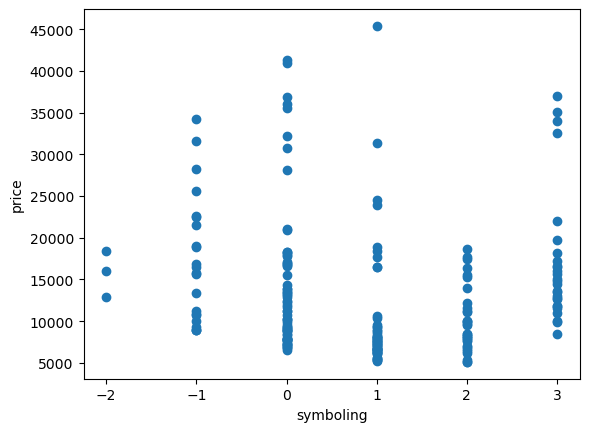

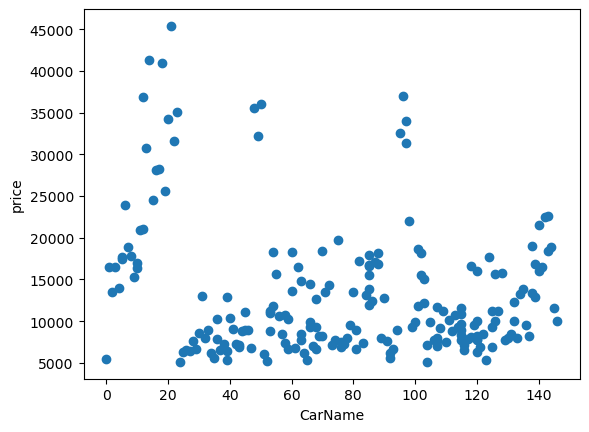

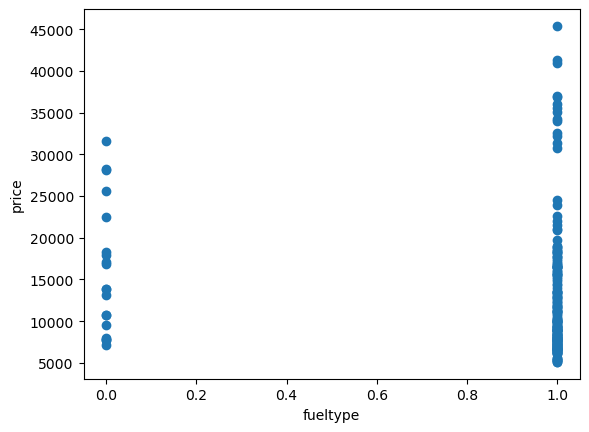

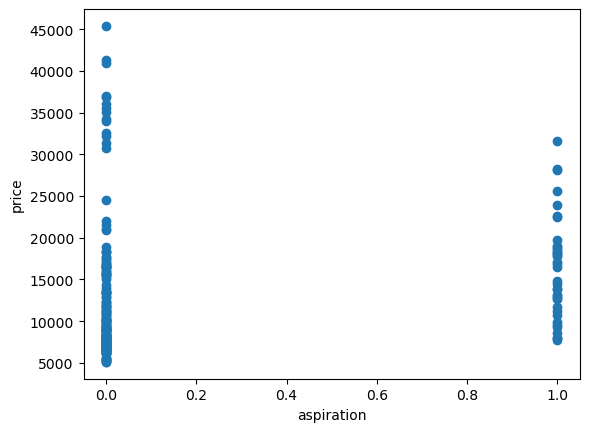

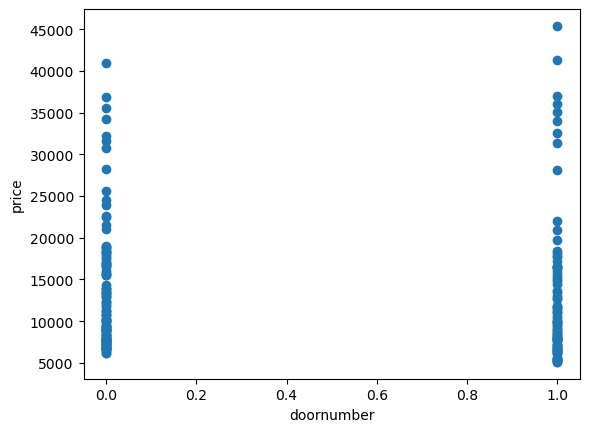

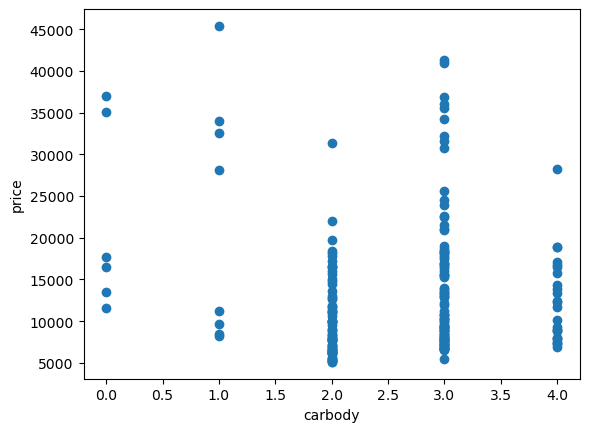

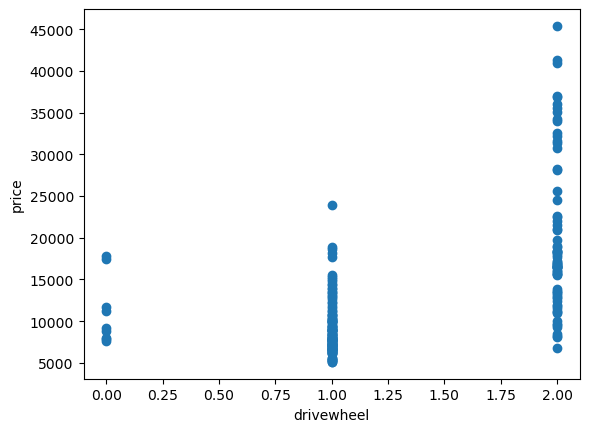

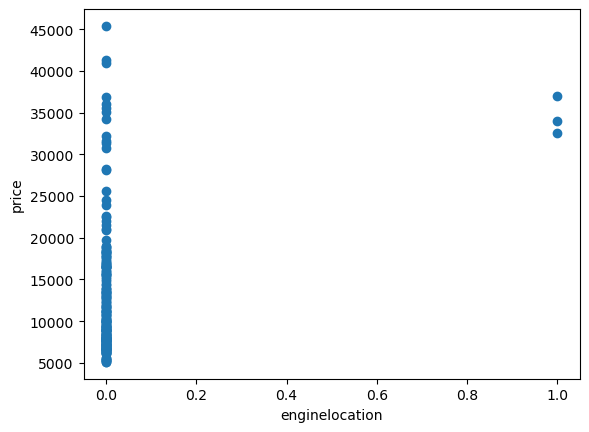

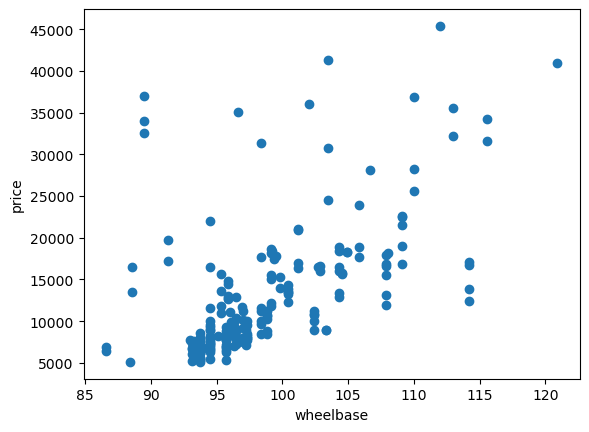

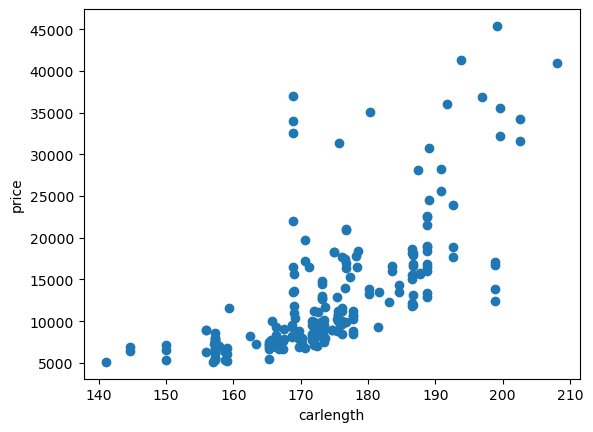

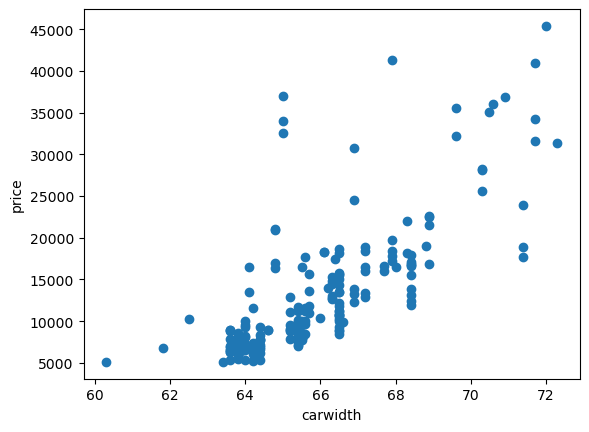

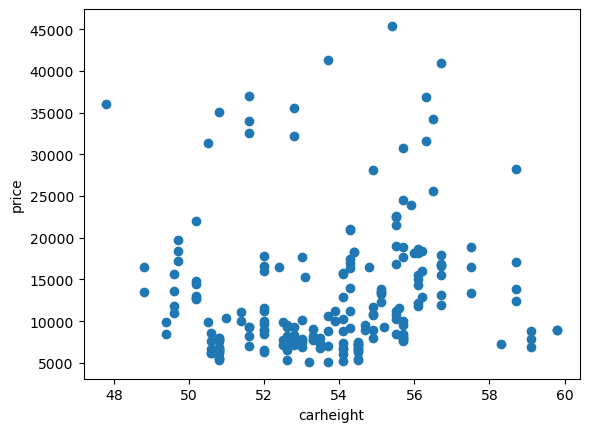

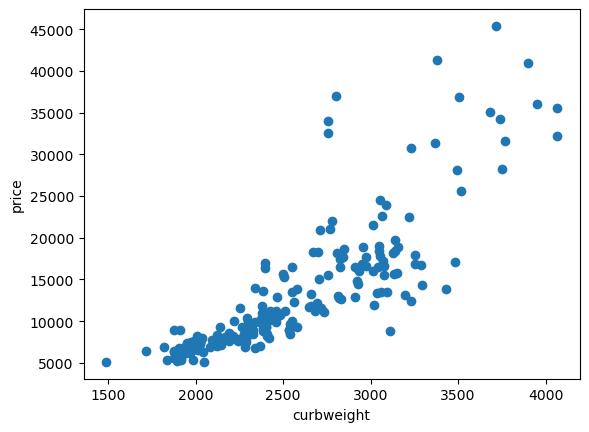

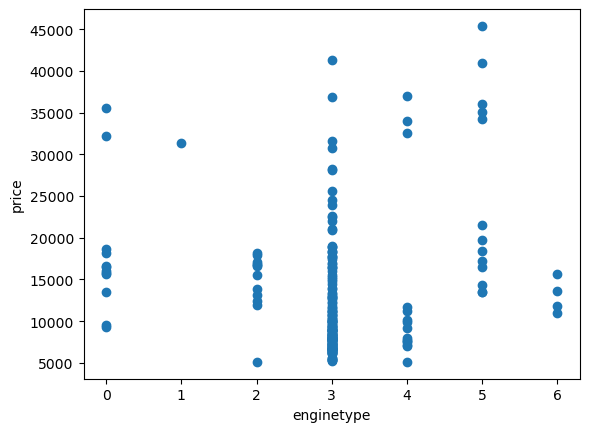

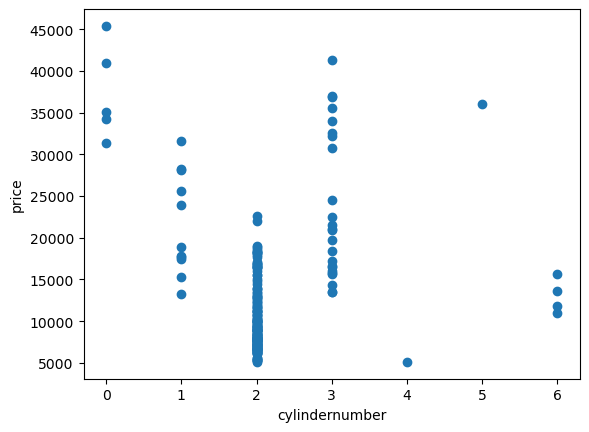

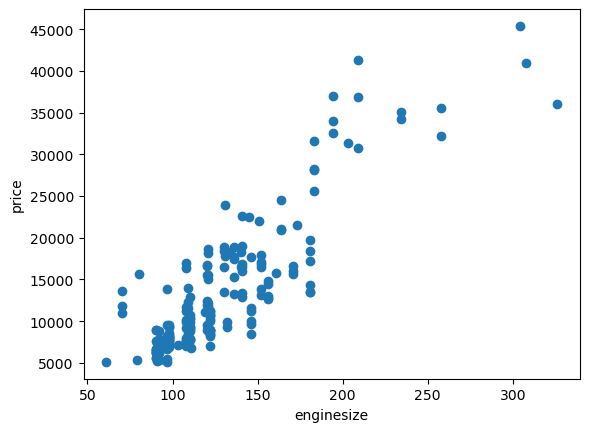

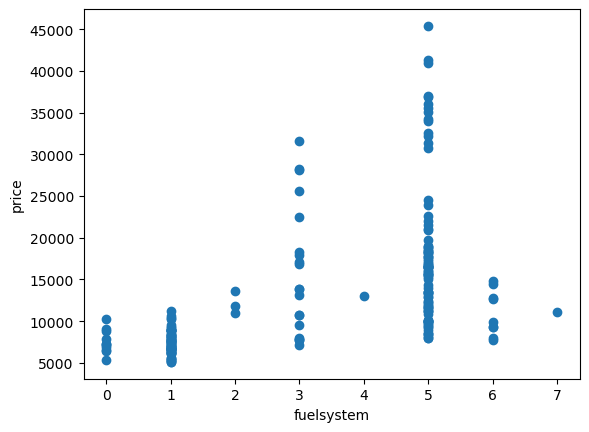

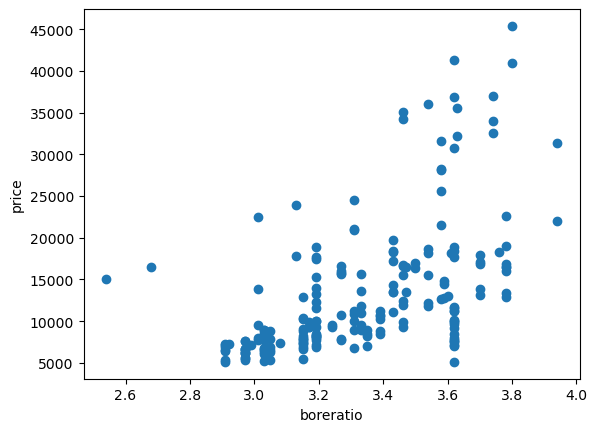

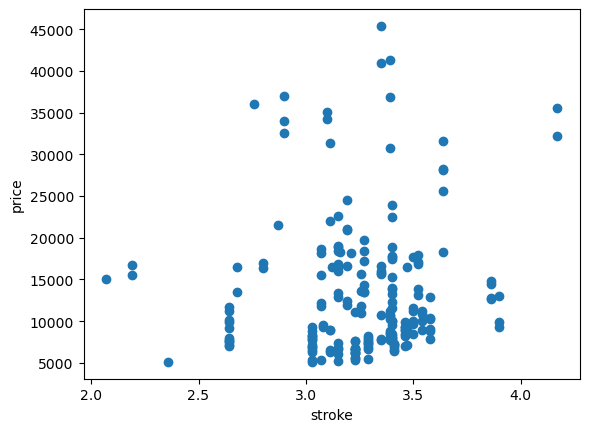

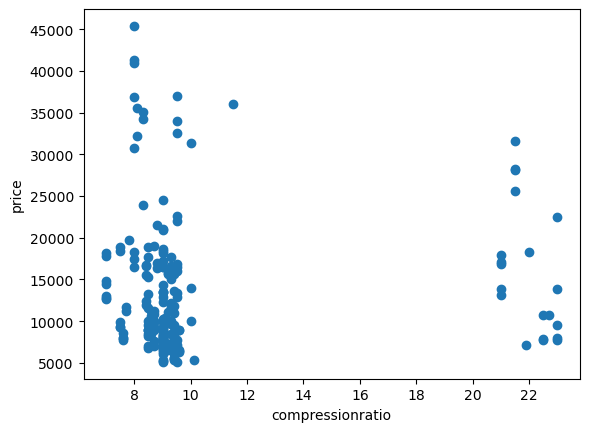

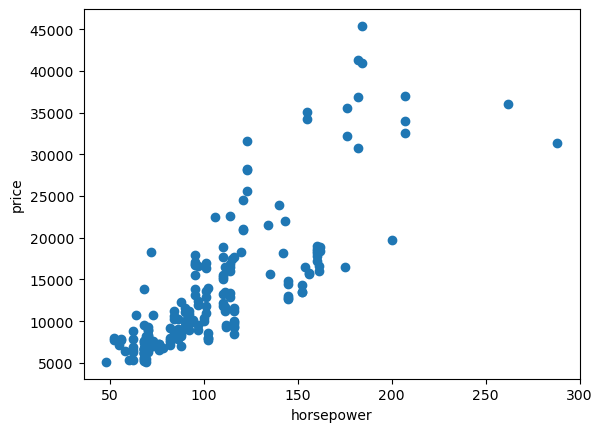

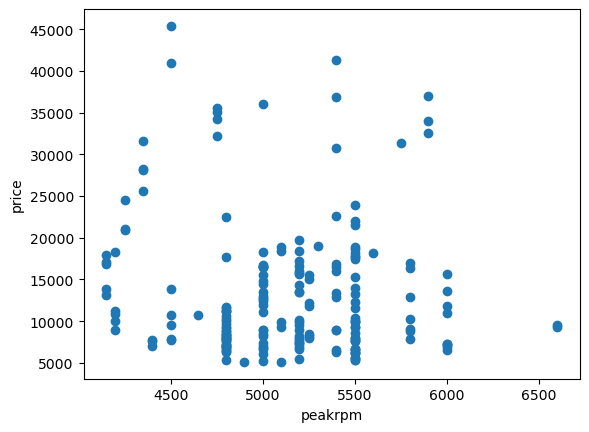

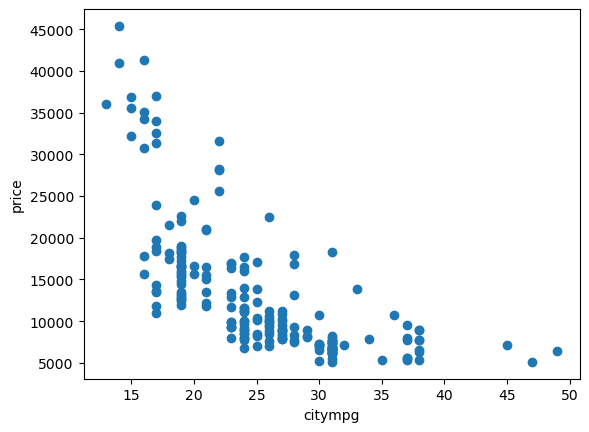

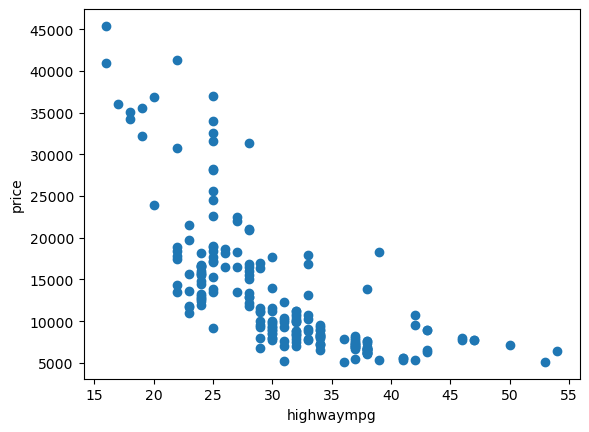

In [62]:
for c in x.columns:
    plt.scatter(x[c], y)
    plt.xlabel(c)
    plt.ylabel('price')
    plt.show()

### Removing features with weak correlation with target variable 

In [63]:
df.drop(columns=['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'enginelocation', 'carheight', 'enginetype', 'cylindernumber', 'fuelsystem', 'compressionratio', 'peakrpm'], inplace=True)

In [64]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### After removing unimportant features, split the data into 60% training size, 20% validation size, 20% test size

In [142]:
#Function to return stacked X and y variables
def get_xy(df, y_label, x_labels=None):
    df = copy.deepcopy(df)
    if not x_labels:
        X = df[[c for c in df.columns if c!=y_label]].values
    else:
        if len(x_labels)==1:
            X = df[x_labels[0]].values.reshape(-1,1)
        else:
            X = df[x_labels].values

    y =df[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))
    return data, X, y

### Extraxting X features and y target

In [66]:
x_labels = df.drop('price', axis=1)
y_label = df['price']

### Preparing training, validation, test data with upper function

In [67]:
_, X_train, y_train = get_xy(train, 'price', x_labels=[col for col in df.columns if col!='price'])
_, X_val, y_val = get_xy(val, 'price', x_labels=[col for col in df.columns if col!='price'])
_, X_test, y_test = get_xy(test, 'price', x_labels=[col for col in df.columns if col!='price'])

In [68]:
lr_model = LinearRegression()

In [69]:
lr_model.fit(X_train, y_train)

LinearRegression()

### R squared to evaluate the model performance (0 to 1)

In [70]:
lr_model.score(X_test, y_test)

0.8463538269868904

### Assigning linear model predictions to y_predict for future refernce

In [71]:
y_predict = lr_model.predict(X_test)

### Initializing the NN model

In [128]:
normalizer = tf.keras.layers.Normalization(input_shape=(X_train.shape[1],), axis=None)
normalizer.adapt(X_train.reshape(-1))
nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [129]:
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=100
)

In [130]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

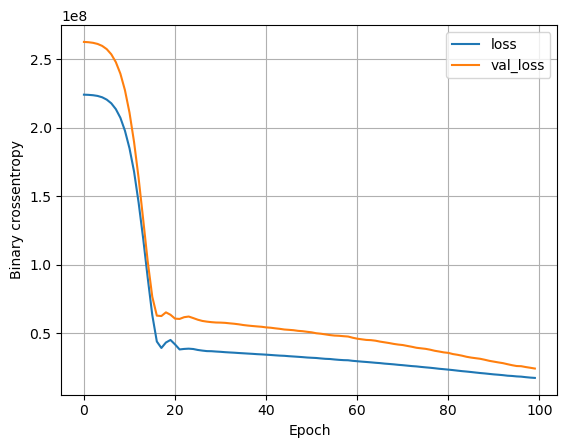

In [131]:
plot_loss(history)

### Assigning NN predictions to y_predict_nn to compare to y_predict

In [132]:
y_predict_nn = nn_model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [133]:
def MSE(y_predict, y_actual):
    return np.square(y_predict-y_actual).mean()

In [134]:
MSE(y_predict, y_test)

12562286.494349262

In [135]:
MSE(y_predict_nn, y_test)

22468500.308924004

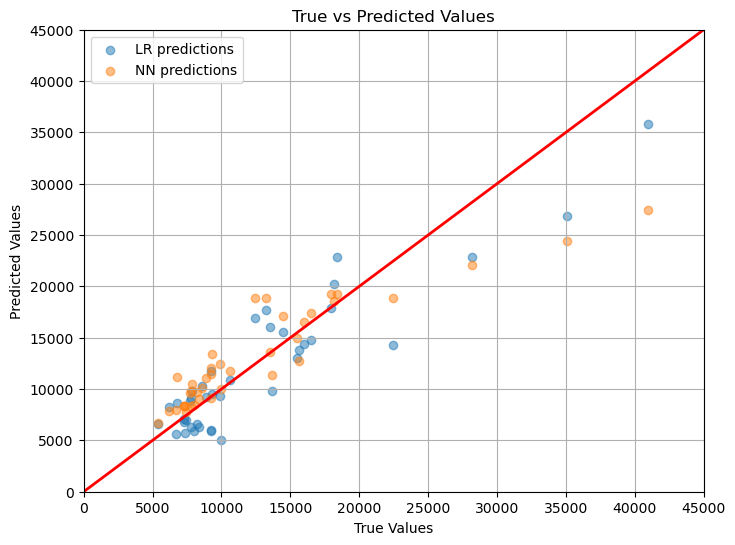

In [139]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, alpha=0.5, label='LR predictions')
plt.scatter(y_test, y_predict_nn, alpha=0.5, label='NN predictions')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()

lims = [0, 45000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, color='red', linewidth=2)

plt.show()

### As you can see, the predictions made by both models spread quite well around the line of best fit